**Prepare packages**

In [216]:
!pip install mat73
# !pip install git+https://github.com/nickkunz/smogn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
# import smogn
import random as rn
from scipy.io import loadmat
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import mat73
from numpy.random import seed
import os

seed = 40
rn.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

**Set directory**

In [218]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Git/WIP_NoteBooks
# %cd /content/gdrive/MyDrive/Colab Notebooks

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Git/WIP_NoteBooks


# Import input data created by MATLAB

In [219]:
# data_features = mat73.loadmat('X_train_python_features_collection.mat')
data_features = mat73.loadmat('X_train_python_features_collection_AfterSortingCorrection_Pooled_Mar2023.mat')
data_features.keys()

dict_keys(['X_train_python_features_collection'])

In [220]:
X_features = data_features['X_train_python_features_collection']

**Normalize the data within 0 to 1**

In [221]:
normalized_features = np.zeros(X_features.shape)

for i in range(X_features.shape[-1]):
    feature = X_features[..., i]
    min_val = np.min(feature)
    # print(min_val)
    max_val = np.max(feature)
    # print(max_val)
    normalized_feature = (feature - min_val) / (max_val - min_val)
    normalized_features[..., i] = normalized_feature
X_features = normalized_features

In [222]:
tabular_data = X_features[201][0]
df = pd.DataFrame(tabular_data, columns = ['max_temp', 'mean_temp', 'points_above_threshold', \
                                           'num_peaks', 'cooling_time', 'abs_cooling_rate_1', 'abs_cooling_rate_2_scaled', 'Exp2_rsquare'])
df

,max_temp,mean_temp,points_above_threshold,num_peaks,cooling_time,abs_cooling_rate_1,abs_cooling_rate_2_scaled,Exp2_rsquare
0,0.443886,0.966825,0.000000,0.058824,0.120381,0.011646,0.000312,0.932185
1,0.554439,0.972113,0.000000,0.117647,0.537545,0.000516,0.000138,0.914669
2,0.705193,0.976649,0.103448,0.176471,0.615018,0.000542,0.002439,0.898493
3,0.740369,0.973925,0.103448,0.117647,0.442193,0.000881,0.001896,0.867718
4,0.688442,0.970296,0.068966,0.117647,0.213349,0.001705,0.000903,0.792941
5,0.676717,0.969652,0.057471,0.117647,0.141836,0.001924,0.000772,0.729938
6,0.656616,0.969361,0.045977,0.117647,0.125149,0.001561,0.000289,0.663672
7,0.614740,0.969328,0.022989,0.117647,0.115614,0.001349,0.000874,0.637954
8,0.574539,0.969468,0.000000,0.117647,0.058403,0.004172,0.000304,0.994235
9,0.582915,0.969346,0.000000,0.117647,0.104887,0.001309,0.001115,0.640793


**Plot sample data**

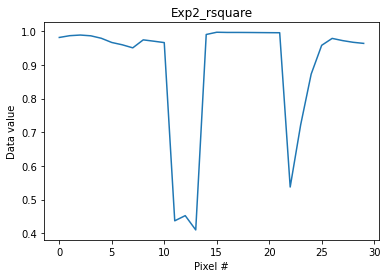

In [223]:
data_index = 7
columns = ['max_temp', 'mean_temp', 'points_above_threshold', \
'num_peaks', 'cooling_time', 'abs_cooling_rate_1', 'abs_cooling_rate_2_scaled', 'Exp2_rsquare']
plt.plot(X_features[5,2,:,data_index])
plt.xlabel('Pixel #')
plt.ylabel(f'Data value')
plt.title(f'{columns[data_index]}')
plt.show()

# Select Features to be used

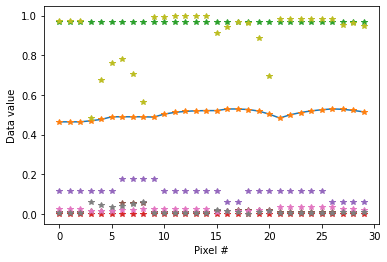

(240, 5, 30, 8)

In [224]:
X_features_trimmed = X_features # [:,:,:,[0,4,5]] [:,:,:,[0,2,3,4,5,7]] 
plt.plot(X_features[0,2,:,0])
plt.plot(X_features_trimmed[0,2,:],'*')
plt.xlabel('Pixel #')
plt.ylabel(f'Data value')
plt.show()
X_features_trimmed.shape

# Helper Functions

In [225]:
def classification_results(string):
  list_of_strings = string.split(" ")
  filtered_string = []
  for i in list_of_strings:
    if i == '': continue
    else: 
      try:
        filtered_string.append(float(i))
      except:
        continue
  classwise_results = np.array(filtered_string[0:15]).reshape(3,5)
  # f1score =  filtered_string[19]
  return classwise_results #, f1score
  
def prediction_results(cnn,X_test,y_test,X_train,y_train):
  test_predictions = cnn.predict(X_test)
  train_predictions = cnn.predict(X_train)

  predictionError = y_test - test_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_test)-np.min(y_test))
  rmse_wrt_mean = rmse/np.mean(y_test)

  print('For Test data--->\nRMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_test)-np.min(y_test),rmse_wrt_range,np.mean(y_test),rmse_wrt_mean))
  
  predictionError = y_train - train_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_train)-np.min(y_train))
  rmse_wrt_mean = rmse/np.mean(y_train)

  print('\nFor Train data--->\nRMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_train)-np.min(y_train),rmse_wrt_range,np.mean(y_train),rmse_wrt_mean))

  data_max = max(np.max(test_predictions), np.max(y_test),np.max(train_predictions), np.max(y_train))
  plt.plot(train_predictions,y_train,'b.')
  plt.plot(test_predictions,y_test,'r.')
  plt.legend(['test','train'])
  plt.plot([0,data_max],[0,data_max])
  plt.show()

def training_history_with_validation(training):
  plt.plot(training.history['loss'])
  plt.plot(training.history['val_loss'])
  plt.ylabel('loss')
  # plt.plot(training.history['root_mean_squared_error'])
  # plt.plot(training.history['val_root_mean_squared_error'])
  # plt.ylabel('root_mean_squared_error')
  plt.xlabel('epoch' )
  plt.legend(['train','dev'])
  plt.show()

def training_history(training):
  plt.plot(training.history['loss'])
  plt.ylabel('loss')
  # plt.plot(training.history['root_mean_squared_error'])
  # plt.ylabel('root_mean_squared_error')
  plt.xlabel('epoch' )
  plt.legend(['train'])
  plt.show()

# def plot_fitting_history(history,filename,dpi):
def plot_fitting_history(history):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  if epochs > 100: plt.xticks(np.arange(0, epochs + 1, step=int(epochs/100)*10))
  else: plt.xticks(np.arange(0, epochs + 1, step=5))
  if 'val_loss' in history.history.keys():
    plt.plot(epoch_data,history.history['val_loss'],'o--')
    plt.legend(['Training','Validation'])
  else:
    plt.legend(['Training'])
  # plt.savefig(filename, dpi=dpi)
  plt.show()

def accuracy_measure(predictions, true_value, percentage):
  scores = []
  for p,t in zip(predictions,true_value):
    if abs(p-t) < t*percentage:
      scores.append(1)
  print('Accuracy: {}% out of {} items'.format(round(sum(scores)/predictions.shape[0]*100,2), predictions.shape[0]))
  return round(sum(scores)/predictions.shape[0],4)

def combined_prediction_results(test_predictions,y_test):
  predictionError = y_test - test_predictions;
  squares = predictionError**2;
  rmse = np.sqrt(np.mean(squares))
  rmse_wrt_range = rmse/(np.max(y_test)-np.min(y_test))
  rmse_wrt_mean = rmse/np.mean(y_test)

  print('RMSE: {}\nRange: {}\nRMSE_wrt_Range: {}\nMean: {}\nRMSE_wrt_Mean: {}'.\
        format(rmse,np.max(y_test)-np.min(y_test),rmse_wrt_range,np.mean(y_test),rmse_wrt_mean))
  
def combined_predictions_4Folds(X,Classifier_model,Q1_model,Q2_model,Q3_model,Q4_model):
  y_test_pred = Classifier_model.predict(X)
  Q1_test_predictions = Q1_model.predict(X)
  Q2_test_predictions = Q2_model.predict(X)
  Q3_test_predictions = Q3_model.predict(X)
  Q4_test_predictions = Q4_model.predict(X)
  Q_test_predictions = np.concatenate((Q1_test_predictions,Q2_test_predictions,Q3_test_predictions,Q4_test_predictions), axis = 1)
  combined_test_predictions1 = np.sum(np.multiply(Q_test_predictions,y_test_pred), axis = 1)
  combined_test_predictions2 = np.sum(np.multiply(Q_test_predictions,np.round(y_test_pred,0)), axis = 1)

  return combined_test_predictions1, combined_test_predictions2

def combined_predictions_2Folds(X,Classifier_model,Q1Q2_model,Q3Q4_model):
  y_test_pred = Classifier_model.predict(X)
  Q1Q2_test_predictions = Q1Q2_model.predict(X)
  Q3Q4_test_predictions = Q3Q4_model.predict(X)
  Q_test_predictions = np.concatenate((Q1Q2_test_predictions,Q3Q4_test_predictions), axis = 1)
  combined_test_predictions1 = np.sum(np.multiply(Q_test_predictions,y_test_pred), axis = 1)
  combined_test_predictions2 = np.sum(np.multiply(Q_test_predictions,np.round(y_test_pred,0)), axis = 1)

  return combined_test_predictions1, combined_test_predictions2

# Import the porosity level (pore diameter) values

In [226]:
pore_data = pd.read_csv('In718 Sample Information.csv') 
max_pore_area = pore_data['Max Pore Diameter'].to_numpy()
y = max_pore_area.reshape(240,1)
y.shape

(240, 1)

# k-fold preparation

In [ ]:
indexes = np.random.permutation(240)
indexes

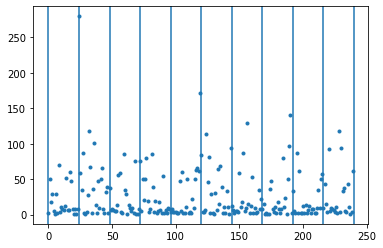

In [228]:
# indexes = np.array([  4, 233,  81, 204, 116, 128, 129, 217, 150, 180, 154,  50, 177,
#        155,  41,   1, 232, 221, 166, 189,  57,  51, 156,  15,  85, 126,
#        178, 206, 212,  94, 239,  30, 234,  42, 218, 121, 161,  99, 197,
#         14, 140,  74, 144, 102, 179,  69, 237,  21, 119,  67, 231, 210,
#         37, 137,  52, 216, 183, 202, 199,   9, 162,  27, 219, 115, 220,
#        223,  34, 227, 113,   7, 171,  63, 185, 136, 158, 132, 141,  19,
#        109, 133, 172,  97, 152,  56,  58,  48, 170,  65, 228, 167, 191,
#          3, 214,  39, 105,  73, 182,  54, 123, 130,  28, 127,  60,  49,
#        236,   0,  20, 148,   8, 111,  78,  53, 138,  79, 143, 207,  35,
#        169, 168,  12,  89,  92,  93, 108,  68, 222,  26,  72,  24,  84,
#        203,  64, 110,  55,  90,  46,  59, 147,  11, 157,  13,  91, 215,
#        103, 131, 175, 225,  10,  71,  66, 114, 101,   5,  16, 192, 142,
#        184,  45, 122, 186,  17, 173,  95,  86,  36,  82,  25,  61,  96,
#        104,  87, 164, 188,  75, 200, 198,  62,  80, 124, 226, 165, 195,
#         18, 112,  40, 153, 118, 213, 159, 201,  47, 229, 107, 181, 135,
#         83,   6, 187, 145, 208, 174, 205,   2, 149,  23, 190, 117, 100,
#        139, 230, 163,  38,  77, 235, 146,  31, 238, 224, 160, 151,  22,
#        176, 134,  33,  43,  29, 194,  76, 106, 211, 120,  70,  32,  98,
#        209, 125, 193,  44,  88, 196])

# indexes = np.array([157, 235,  96, 213, 172, 135, 210, 113, 233,  75,  50,  47,  78,
#         62,  21, 141, 194, 219, 209,  95, 184,  90, 185,  98,  12, 236,
#         42,  15, 107, 134, 179, 191,  40, 231, 183, 229,  10,  82, 170,
#        222, 100,   1, 232, 171, 186, 211,  19, 125, 230, 165,  77,  76,
#        148, 104, 175, 205, 228, 132,  57,  37, 188, 216, 137,  54, 193,
#         86, 119, 153,  23,  56, 156,  60, 234,  71,   6, 130, 237,   7,
#        204, 124, 118,  38, 154, 127, 180, 161, 177, 182, 192, 115, 208,
#         59,  48, 102,  70,  65, 144, 139, 155,  55, 174, 142, 121, 207,
#        109, 212, 169, 159,  99, 238, 163,  49, 110,  52,  74,  26,  45,
#        226, 227,   4,  11,  53, 147,  79,   8, 214,   5, 143, 224, 166,
#        122,  22,  68,  20, 160,  14,  32, 195,  64, 152, 201,  81,  58,
#         13, 187,  72,  87, 123, 164, 196, 206,  51, 198,  24,  94, 106,
#         16,  63, 128, 105,  28,  73,  89, 149,  93, 239,  83,  43,  92,
#         18, 145, 158, 150,  39, 225, 223, 200, 111,  66, 117, 221, 140,
#        101,  69,   2,  84,  17, 146, 217,  29,  30, 114, 202, 103,  67,
#         25, 176, 215, 116, 168,  91, 120,  35, 112, 129, 189, 136, 190,
#         80, 181, 126, 197, 220, 203,   0,  36, 133,  33,  88, 162,  34,
#         44,  97,  85,  61, 167, 199, 173,  27, 138,   9,  31,   3, 108,
#        178, 218,  46, 131, 151,  41])

y_shuffled = y[indexes]
plt.plot(y_shuffled,'.')
for i in np.linspace(0,240,11):
  plt.axvline(i)
plt.show()
# indexes

**Prepare dictionaries for testing-folds**

In [229]:
test_indexes_dictionary = {}
counter = 1
for i in np.arange(0,240,24):
  i = int(i)
  key_name = 'test_data_' + str(counter) + '_indexes'
  test_indexes_dictionary.update({key_name: indexes[i:i+24]})
  counter = counter + 1

In [230]:
test_indexes_dictionary.keys()

dict_keys(['test_data_1_indexes', 'test_data_2_indexes', 'test_data_3_indexes', 'test_data_4_indexes', 'test_data_5_indexes', 'test_data_6_indexes', 'test_data_7_indexes', 'test_data_8_indexes', 'test_data_9_indexes', 'test_data_10_indexes'])

In [231]:
test_indexes_dictionary['test_data_1_indexes'], \
test_indexes_dictionary['test_data_2_indexes'], \
test_indexes_dictionary['test_data_3_indexes'],\
test_indexes_dictionary['test_data_4_indexes'],

(array([157, 235,  96, 213, 172, 135, 210, 113, 233,  75,  50,  47,  78,
         62,  21, 141, 194, 219, 209,  95, 184,  90, 185,  98]),
 array([ 12, 236,  42,  15, 107, 134, 179, 191,  40, 231, 183, 229,  10,
         82, 170, 222, 100,   1, 232, 171, 186, 211,  19, 125]),
 array([230, 165,  77,  76, 148, 104, 175, 205, 228, 132,  57,  37, 188,
        216, 137,  54, 193,  86, 119, 153,  23,  56, 156,  60]),
 array([234,  71,   6, 130, 237,   7, 204, 124, 118,  38, 154, 127, 180,
        161, 177, 182, 192, 115, 208,  59,  48, 102,  70,  65]))

In [232]:
list_of_y = []
for id in test_indexes_dictionary['test_data_9_indexes']:
  if y[id]>25: list_of_y.append((np.squeeze(y[id]),id))
sorted(list_of_y)

[(array(32.92), 202),
 (array(34.87), 220),
 (array(50.84), 0),
 (array(57.92), 36),
 (array(61.17), 215),
 (array(87.56), 25)]

**Prepare dictionaries for training-folds**

In [233]:
train_indexes_dictionary = {}
counter = 1
for key in test_indexes_dictionary.keys():
  key_name = 'train_data_' + str(counter) + '_indexes'
  train_indexes = []
  for _, num in enumerate(indexes):
    if num not in test_indexes_dictionary[key]:
      train_indexes.append(num)
  train_indexes = np.array(train_indexes)
  train_indexes_dictionary.update({key_name: train_indexes})
  counter = counter + 1

In [234]:
train_indexes_dictionary.keys()

dict_keys(['train_data_1_indexes', 'train_data_2_indexes', 'train_data_3_indexes', 'train_data_4_indexes', 'train_data_5_indexes', 'train_data_6_indexes', 'train_data_7_indexes', 'train_data_8_indexes', 'train_data_9_indexes', 'train_data_10_indexes'])

In [235]:
train_indexes_dictionary['train_data_2_indexes']

array([157, 235,  96, 213, 172, 135, 210, 113, 233,  75,  50,  47,  78,
        62,  21, 141, 194, 219, 209,  95, 184,  90, 185,  98, 230, 165,
        77,  76, 148, 104, 175, 205, 228, 132,  57,  37, 188, 216, 137,
        54, 193,  86, 119, 153,  23,  56, 156,  60, 234,  71,   6, 130,
       237,   7, 204, 124, 118,  38, 154, 127, 180, 161, 177, 182, 192,
       115, 208,  59,  48, 102,  70,  65, 144, 139, 155,  55, 174, 142,
       121, 207, 109, 212, 169, 159,  99, 238, 163,  49, 110,  52,  74,
        26,  45, 226, 227,   4,  11,  53, 147,  79,   8, 214,   5, 143,
       224, 166, 122,  22,  68,  20, 160,  14,  32, 195,  64, 152, 201,
        81,  58,  13, 187,  72,  87, 123, 164, 196, 206,  51, 198,  24,
        94, 106,  16,  63, 128, 105,  28,  73,  89, 149,  93, 239,  83,
        43,  92,  18, 145, 158, 150,  39, 225, 223, 200, 111,  66, 117,
       221, 140, 101,  69,   2,  84,  17, 146, 217,  29,  30, 114, 202,
       103,  67,  25, 176, 215, 116, 168,  91, 120,  35, 112, 12

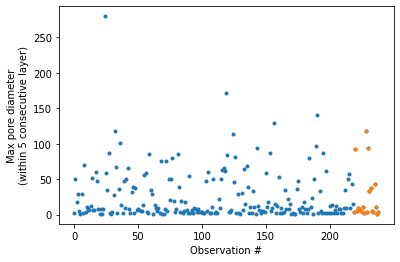

In [236]:
test_indexes = np.arange(0,239)
train = y_shuffled[0:-1]
plt.plot(test_indexes,train,'.')

test_indexes = np.arange(219,239)
train = y_shuffled[-21:-1]
plt.plot(test_indexes,train,'.')

plt.xlabel('Observation #')
plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
plt.show()

In [237]:
folds = 10
items_per_fold = int(len(y)/folds)

# Functions for different Models

In [267]:
def get_classifier_model(X_train, classes_train):

  os.environ['PYTHONHASHSEED'] = '0'
  np.random.seed(0)
  rn.seed(12345)
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  from keras import backend as K
  tf.random.set_seed(1234)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

  classifier_model = models.Sequential([

      # =========================================================================================

      layers.SeparableConv2D(filters=2**5, kernel_size=2, padding = 'same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
      layers.MaxPooling2D(2),
      layers.BatchNormalization(),
      
      layers.SeparableConv2D(filters=2**4, kernel_size=2, padding = 'same', activation='relu'),
      layers.MaxPooling2D((2)),
      
      layers.SeparableConv2D(filters=2**3, kernel_size=2, padding = 'same', activation='relu'),
      layers.BatchNormalization(),

      # =========================================================================================

      # layers.SeparableConv2D(filters=16, kernel_size=2, padding = 'same', activation='relu', input_shape=(5, 30, 3)),
      # layers.BatchNormalization(),
      # layers.SeparableConv2D(filters=16, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.MaxPooling2D(2),
      # layers.Dropout(0.25),
      
      # layers.SeparableConv2D(filters=32, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.SeparableConv2D(filters=32, kernel_size=2, padding = 'same', activation='relu'),
      # layers.BatchNormalization(),
      # layers.MaxPooling2D(2),
      # layers.Dropout(0.25),
          
      layers.Flatten(),
      layers.Dense(2**6, activation='relu'),
      # layers.Dropout(0.5),
      layers.Dense(2**5, activation='relu'),
      # layers.Dropout(0.5),
      # layers.Dense(2**6, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      layers.Dense(int(np.max(classes_train)+1), activation='softmax')
  ])

  learning_rate = 0.0001
  classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])
  
  # X_train, X_val, classes_train, y_val = train_test_split(X_train, classes_train, test_size=0.2,
  #                                                   random_state=42, stratify=classes_train)
  # early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
  # classifier_training = classifier_model.fit(X_train, classes_train, epochs=500, batch_size=32, shuffle=True,
  #           validation_data=(X_val, y_val), callbacks = early_callbacks, verbose=0)
  
  early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
  classifier_training = classifier_model.fit(X_train, classes_train, epochs=500, batch_size=32, shuffle=True,
            validation_split = 0.1, callbacks = early_callbacks, verbose=0)

  # early_callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
  # classifier_training = classifier_model.fit(X_train, classes_train, epochs=100, batch_size=16, shuffle=True, callbacks = early_callbacks, verbose=0)

  return classifier_model, classifier_training

def get_classificaion_results(classifier_model,X_test,classes_test):
  from sklearn.metrics import confusion_matrix , classification_report
  import numpy as np
  import seaborn as sn

  y_pred = classifier_model.predict(X_test)
  y_pred_classes = [np.argmax(element) for element in y_pred]

  # cm = tf.math.confusion_matrix(labels=classes_test,predictions=y_pred_classes)
  # plt.figure(figsize = (7,5))
  # sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  # plt.xlabel('Predicted');
  # plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(classes_test, y_pred_classes))
  return classification_report(classes_test, y_pred_classes)

# Assign the class labels

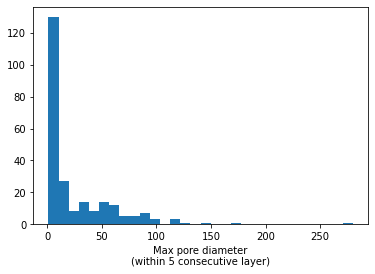

In [290]:
plt.hist(y, bins=30)
plt.xlabel('Max pore diameter\n(within 5 consecutive layer)')
plt.ylabel('Frequency')
plt.show()

In [269]:
new_classes = np.ones(X_features_trimmed.shape[0])*-1
low_threshold = 5
medium_threshold = 25
low_pore_indexes = np.where(y<=low_threshold)[0]
medium_pore_indexes = np.where((y>low_threshold) & (y<=medium_threshold))[0]
large_pore_indexes = np.where(y>medium_threshold)[0]
new_classes[low_pore_indexes] = 0
new_classes[medium_pore_indexes] = 1
new_classes[large_pore_indexes] = 2

In [270]:
np.where(y<=low_threshold)[0].shape, np.where((y>low_threshold) & \
        (y<=medium_threshold))[0].shape, np.where(y>medium_threshold)[0].shape

((77,), (84,), (79,))

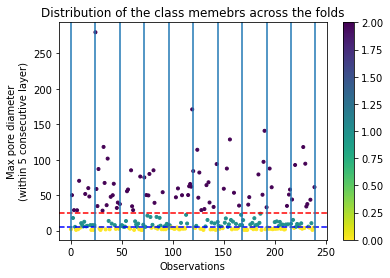

In [271]:
plt.scatter(range(y_shuffled.shape[0]),y_shuffled,c=new_classes[indexes],marker = '.', cmap = 'viridis_r')
plt.axhline(low_threshold,color='blue', linestyle='--')
plt.axhline(medium_threshold,color='red', linestyle='--')
plt.colorbar()
for i in np.linspace(0,240,11):
  plt.axvline(i)
plt.xlabel('Observations')
plt.ylabel('Max pore diameter\n(within 5 consecutive layer)')
plt.title('Distribution of the class memebrs across the folds')
plt.show()

# Classification Model: Thermal Feature based


 Fold: 1


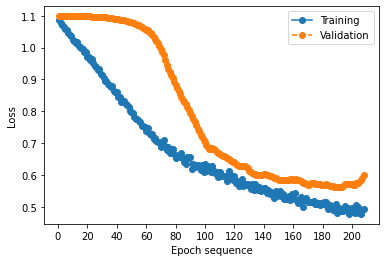

Testing Results
1/1 [==============================] - 0s 122ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.82      0.82      0.82        11
         2.0       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24





 Fold: 2


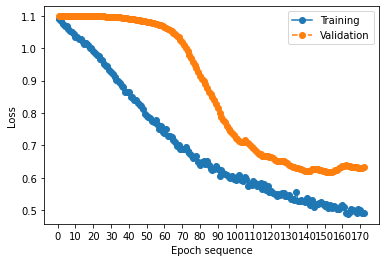

Testing Results
1/1 [==============================] - 0s 183ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80         7
         1.0       0.20      0.33      0.25         3
         2.0       1.00      0.79      0.88        14

    accuracy                           0.75        24
   macro avg       0.65      0.66      0.64        24
weighted avg       0.83      0.75      0.78        24





 Fold: 3


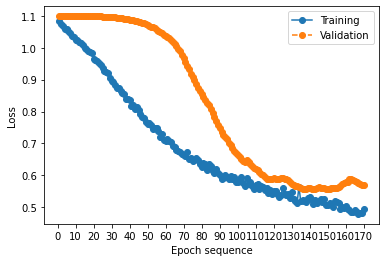

Testing Results
1/1 [==============================] - 0s 134ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.38      0.50      0.43         6
         1.0       0.60      0.55      0.57        11
         2.0       1.00      0.86      0.92         7

    accuracy                           0.62        24
   macro avg       0.66      0.63      0.64        24
weighted avg       0.66      0.62      0.64        24





 Fold: 4


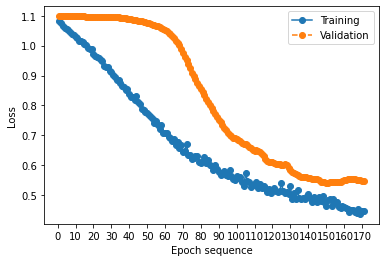

Testing Results
1/1 [==============================] - 0s 121ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         6
         1.0       0.67      0.36      0.47        11
         2.0       0.75      0.86      0.80         7

    accuracy                           0.58        24
   macro avg       0.61      0.63      0.59        24
weighted avg       0.62      0.58      0.57        24





 Fold: 5


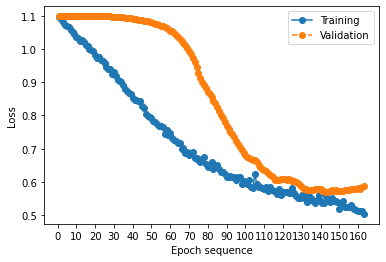

Testing Results
1/1 [==============================] - 0s 240ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.58      0.70        12
         1.0       0.33      0.75      0.46         4
         2.0       1.00      0.88      0.93         8

    accuracy                           0.71        24
   macro avg       0.74      0.74      0.70        24
weighted avg       0.83      0.71      0.74        24





 Fold: 6


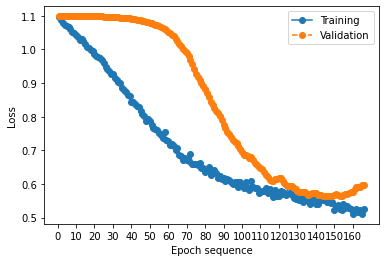

Testing Results
1/1 [==============================] - 0s 366ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         8
         1.0       0.56      1.00      0.71         5
         2.0       0.91      0.91      0.91        11

    accuracy                           0.79        24
   macro avg       0.82      0.80      0.76        24
weighted avg       0.87      0.79      0.79        24





 Fold: 7


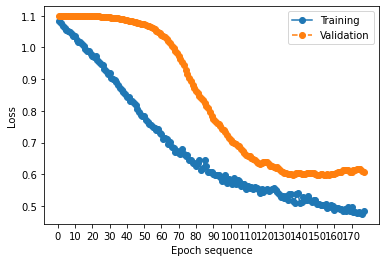

Testing Results
1/1 [==============================] - 0s 122ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.40      0.33      0.36         6
         1.0       0.69      0.69      0.69        13
         2.0       0.83      1.00      0.91         5

    accuracy                           0.67        24
   macro avg       0.64      0.68      0.66        24
weighted avg       0.65      0.67      0.66        24





 Fold: 8


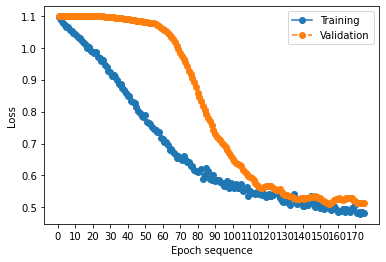

Testing Results
1/1 [==============================] - 0s 182ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       1.00      0.56      0.71         9
         2.0       0.60      1.00      0.75         6

    accuracy                           0.79        24
   macro avg       0.83      0.81      0.78        24
weighted avg       0.86      0.79      0.79        24





 Fold: 9


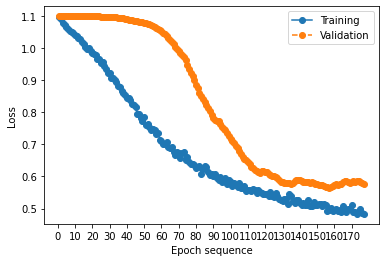

Testing Results
1/1 [==============================] - 0s 126ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.67      0.50      0.57         8
         2.0       0.62      0.83      0.71         6

    accuracy                           0.75        24
   macro avg       0.73      0.74      0.73        24
weighted avg       0.75      0.75      0.74        24





 Fold: 10


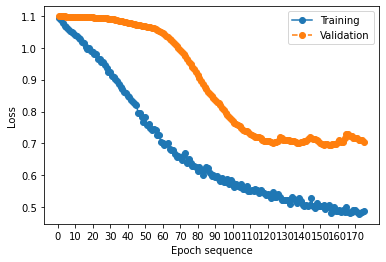

Testing Results
1/1 [==============================] - 0s 181ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80         7
         1.0       0.71      0.56      0.63         9
         2.0       0.78      0.88      0.82         8

    accuracy                           0.75        24
   macro avg       0.75      0.76      0.75        24
weighted avg       0.75      0.75      0.74        24






In [272]:
train_indexes_list = list(train_indexes_dictionary.keys())
test_indexes_list = list(test_indexes_dictionary.keys())
result_list = []
train_f1score_list = []
train_stacked_array = np.zeros((0, 5))
test_stacked_array = np.zeros((0, 5))

for i in range(len(train_indexes_list)):

  print('\n Fold:',str(i+1))
  X_train = X_features_trimmed[train_indexes_dictionary[train_indexes_list[i]]]
  y_train = y[train_indexes_dictionary[train_indexes_list[i]]]
  # classes_train = classes[train_indexes_dictionary[train_indexes_list[i]]]
  classes_train = new_classes[train_indexes_dictionary[train_indexes_list[i]]]

  X_test = X_features_trimmed[test_indexes_dictionary[test_indexes_list[i]]]
  y_test = y[test_indexes_dictionary[test_indexes_list[i]]]
  # classes_test = classes[test_indexes_dictionary[test_indexes_list[i]]]
  classes_test = new_classes[test_indexes_dictionary[test_indexes_list[i]]]

  classifier_model, classifier_training = get_classifier_model(X_train, classes_train)
  plt.figure()
  plot_fitting_history(classifier_training)

  # print('Training Results\n=================')
  # train_classification_results = get_classificaion_results(classifier_model,X_train,classes_train)
  # train_classwise_results, train_f1score = classification_results(train_classification_results)
  # train_stacked_array = np.vstack((train_stacked_array,train_classwise_results))
  # train_f1score_list.append(train_f1score)

  print('Testing Results\n=================')
  test_classification_results = get_classificaion_results(classifier_model,X_test,classes_test)
  # test_classwise_results, test_f1score = classification_results(test_classification_results)
  test_classwise_results = classification_results(test_classification_results)
  
  test_stacked_array = np.vstack((test_stacked_array,test_classwise_results))
  # result_list.append(test_f1score)
  print('\n\n')

In [273]:
df_test_results = pd.DataFrame(test_stacked_array, columns=['Class','Precision','Recall','f1score','support'])

stacked_items = np.zeros((0, 1))  # Initialize an empty array with 0 rows and n_cols columns
for i in range(10):
    stacked_items = np.vstack((stacked_items, i+1, i+1, i+1))

df_test_results["fold #"] = stacked_items
df_test_results

,Class,Precision,Recall,f1score,support,fold #
0,0.0,0.67,0.67,0.67,6.0,1.0
1,1.0,0.82,0.82,0.82,11.0,1.0
2,2.0,1.00,1.00,1.00,7.0,1.0
3,0.0,0.75,0.86,0.80,7.0,2.0
4,1.0,0.20,0.33,0.25,3.0,2.0
5,2.0,1.00,0.79,0.88,14.0,2.0
6,0.0,0.38,0.50,0.43,6.0,3.0
7,1.0,0.60,0.55,0.57,11.0,3.0
8,2.0,1.00,0.86,0.92,7.0,3.0
9,0.0,0.40,0.67,0.50,6.0,4.0


In [274]:
df_test_results.to_csv('Thermal feature based results [5-25] thresholds_newFeatures.csv', index=False)

# Result analysis

In [275]:
df_TF = pd.read_csv('Thermal feature based results [5-25] thresholds_newFeatures.csv')

In [276]:
df = df_TF[df_TF['Class']==0]
df['f1score'].mean()

0.672

In [277]:
df = df_TF[df_TF['Class']==1]
df['f1score'].mean()

0.588

In [278]:
df = df_TF[df_TF['Class']==2]
df['f1score'].mean()

0.8629999999999999

In [279]:
def plot_classwise_classification_results(class_label,result, filename):
  result_list = []
  for fold in range(10):
    fold = fold + 1.
    df_fold = df_TF[df_TF['fold #']==fold]
    df = df_fold[df_fold['Class']==class_label]
    result_list.append(df[result].mean())
  # result_list
  avg_result = sum(result_list)/len(result_list)
  print(f'Average {result} score: {round(avg_result,4)}')
  plt.plot(result_list,'*-')
  plt.axhline(avg_result,color='red', linestyle='--')
  plt.xlabel('Fold #')
  plt.ylabel(result)
  plt.title(f'{result} values for Class {class_label}')
  plt.ylim([0,1.])  
  # plt.savefig(filename, dpi = 600)
  plt.show()

Average Precision score: 0.702


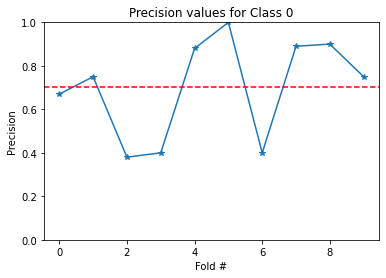

Average Precision score: 0.625


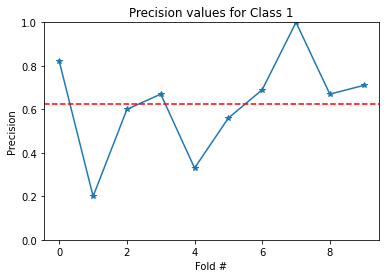

Average Precision score: 0.849


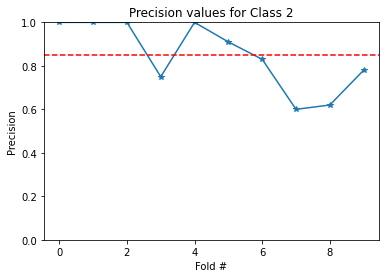

In [293]:
result = 'Precision' # result: {'Precision','Recall','f1score'}
filename = result + ' plot for class 0 porosity level.png'
plot_classwise_classification_results(class_label = 0, result = result, filename = filename)
filename = result + ' plot for class 1 porosity level.png'
plot_classwise_classification_results(class_label = 1, result = result, filename = filename)
filename = result + ' plot for class 2 porosity level.png'
plot_classwise_classification_results(class_label = 2, result = result, filename = filename)

**Plot mean results (e.g., f1-score)**

In [281]:
result_list = []
for fold in range(10):
  fold = fold + 1.
  df = df_TF[df_TF['fold #']==fold]
  result_list.append(df['f1score'].mean())
# result_list

Average f1 score: 0.7077


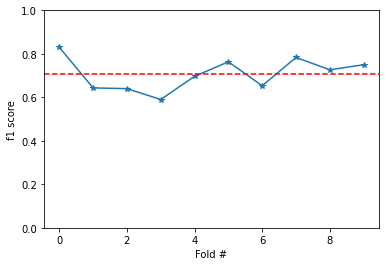

In [282]:
avg_f1score = sum(result_list)/len(result_list)
print(f'Average f1 score: {round(avg_f1score,4)}')
plt.plot(result_list,'*-')
plt.axhline(avg_f1score,color='red', linestyle='--')
plt.xlabel('Fold #')
plt.ylabel('f1 score')
plt.ylim([0,1.])
plt.show()

# Classification Model: Thermal History based

In [283]:
# train_indexes_list = list(train_indexes_dictionary.keys())
# test_indexes_list = list(test_indexes_dictionary.keys())
# test_f1score_list_TH = []
# train_f1score_list = []
# train_stacked_array = np.zeros((0, 5))
# test_stacked_array = np.zeros((0, 5))

# for i in range(len(train_indexes_list)):

#   print('\nRound:',str(i+1))
#   X_train = X_profiles[train_indexes_dictionary[train_indexes_list[i]]]
#   y_train = y[train_indexes_dictionary[train_indexes_list[i]]]
#   # classes_train = classes[train_indexes_dictionary[train_indexes_list[i]]]
#   classes_train = new_classes[train_indexes_dictionary[train_indexes_list[i]]]

#   X_test = X_profiles[test_indexes_dictionary[test_indexes_list[i]]]
#   y_test = y[test_indexes_dictionary[test_indexes_list[i]]]
#   # classes_test = classes[test_indexes_dictionary[test_indexes_list[i]]]
#   classes_test = new_classes[test_indexes_dictionary[test_indexes_list[i]]]

#   classifier_model, classifier_training = get_classifier_model(X_train, classes_train)
#   plt.figure()
#   plot_fitting_history(classifier_training)

#   # print('Training Results\n=================')
#   # train_classification_results = get_classificaion_results(classifier_model,X_train,classes_train)
#   # train_classwise_results, train_f1score = classification_results(train_classification_results)
#   # train_stacked_array = np.vstack((train_stacked_array,train_classwise_results))
#   # train_f1score_list.append(train_f1score)

#   print('Testing Results\n=================')
#   test_classification_results = get_classificaion_results(classifier_model,X_test,classes_test)
#   test_classwise_results, test_f1score = classification_results(test_classification_results)
#   test_stacked_array = np.vstack((test_stacked_array,test_classwise_results))
#   test_f1score_list_TH.append(test_f1score)
#   print('\n\n')

In [284]:
# df_test_results_TH = pd.DataFrame(test_stacked_array, columns=['class','Precision','Recall','f1-score','support'])

# stacked_items = np.zeros((0, 1))  # Initialize an empty array with 0 rows and n_cols columns
# for i in range(10):
#     stacked_items = np.vstack((stacked_items, i+1, i+1, i+1))

# df_test_results_TH["fold #"] = stacked_items
# df_test_results_TH

In [285]:
# df_test_results_TH.to_csv('Thermal history based results [10-80] thresholds.csv', index=False)

In [286]:
# avg_f1score = sum(test_f1score_list_TH)/len(test_f1score_list_TH)
# print(f'Average f1 score: {round(avg_f1score,4)}')
# plt.plot(test_f1score_list_TH,'*-')
# plt.axhline(avg_f1score,color='red', linestyle='--')
# plt.xlabel('Fold #')
# plt.ylabel('f1 score')
# plt.show()

In [287]:
# df_TH = pd.read_csv('Thermal history based results [10-80] thresholds.csv')

# Implementation of Paulson (2020) Paper

In [288]:
# !pip install deap

In [289]:
# import random
# from deap import creator, base, tools, algorithms

# # Define the problem to be solved
# # X is the input data, y is the output data
# X = X_profiles  # Input data
# y = y  # Output data

# # # Define the evaluation function
# # def evaluate_fitness(individual):
# #     # individual is a list of 0's and 1's representing the selected features
# #     # Convert individual to a list of selected features
# #     selected_features = [i for i, x in enumerate(individual) if x == 1]
# #     # Use selected_features as input for a machine learning model
# #     # and calculate the fitness score based on how well the model performs
# #     # return the fitness score as a tuple
# #     return (fitness_score,)

# def evaluate_fitness(individual):
#     # assume X is a numpy array containing the original feature set
#     selected_features = [i for i, x in enumerate(individual) if x == 1]
#     X_selected = X[:, selected_features]
    
#     # assume y is a numpy array containing the target variable
#     # assume clf is a scikit-learn classifier (e.g., LogisticRegression, RandomForestClassifier, etc.)
#     print(X_selected.shape)
#     classifier_model.fit(X_selected, y)
#     accuracy = classifier_model.score(X_selected, y)
    
#     # maximize accuracy, so negate it to minimize fitness
#     fitness = -accuracy
#     fitness_score = fitness
#     return (fitness_score,)

# # Define the genetic algorithm parameters
# POPULATION_SIZE = 50
# P_CROSSOVER = 0.9
# P_MUTATION = 0.1
# MAX_GENERATIONS = 100
# HALL_OF_FAME_SIZE = 10

# # Define the fitness function and the individual creator
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# # Define the toolbox and register the necessary functions
# toolbox = base.Toolbox()
# toolbox.register("attr_bool", random.randint, 0, 1)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X[0]))
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("evaluate", evaluate_fitness)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# toolbox.register("select", tools.selTournament, tournsize=3)

# # Run the genetic algorithm
# population = toolbox.population(n=POPULATION_SIZE)
# hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("max", max)

# for generation in range(MAX_GENERATIONS):
#     offspring = algorithms.varAnd(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION)
#     fits = toolbox.map(toolbox.evaluate, offspring)
#     for fit, ind in zip(fits, offspring):
#         ind.fitness.values = fit
#     population = toolbox.select(offspring, k=len(population))
#     hof.update(population)
#     record = stats.compile(population)
#     print("Generation ", generation, ":", record)
    
# # Print the best individual and its fitness score
# best_individual = hof[0]
# print("Best individual: ", best_individual)
# print("Fitness score: ", best_individual.fitness.values[0])